# Quetsion#4

## Compute gradient magnitude for attached image “Q4_Image” (using built-in sobel gradients function).
#### 1. Stretch the resulting magnitude (between 0 to 255) for better visualization 
#### 2. Compute the histogram of gradient magnitude 
#### 3. Compute gradient orientation (the angle of gradient vector) 
#### 4. Compute histogram of gradient orientation (angle between 0 and 2*pi) 

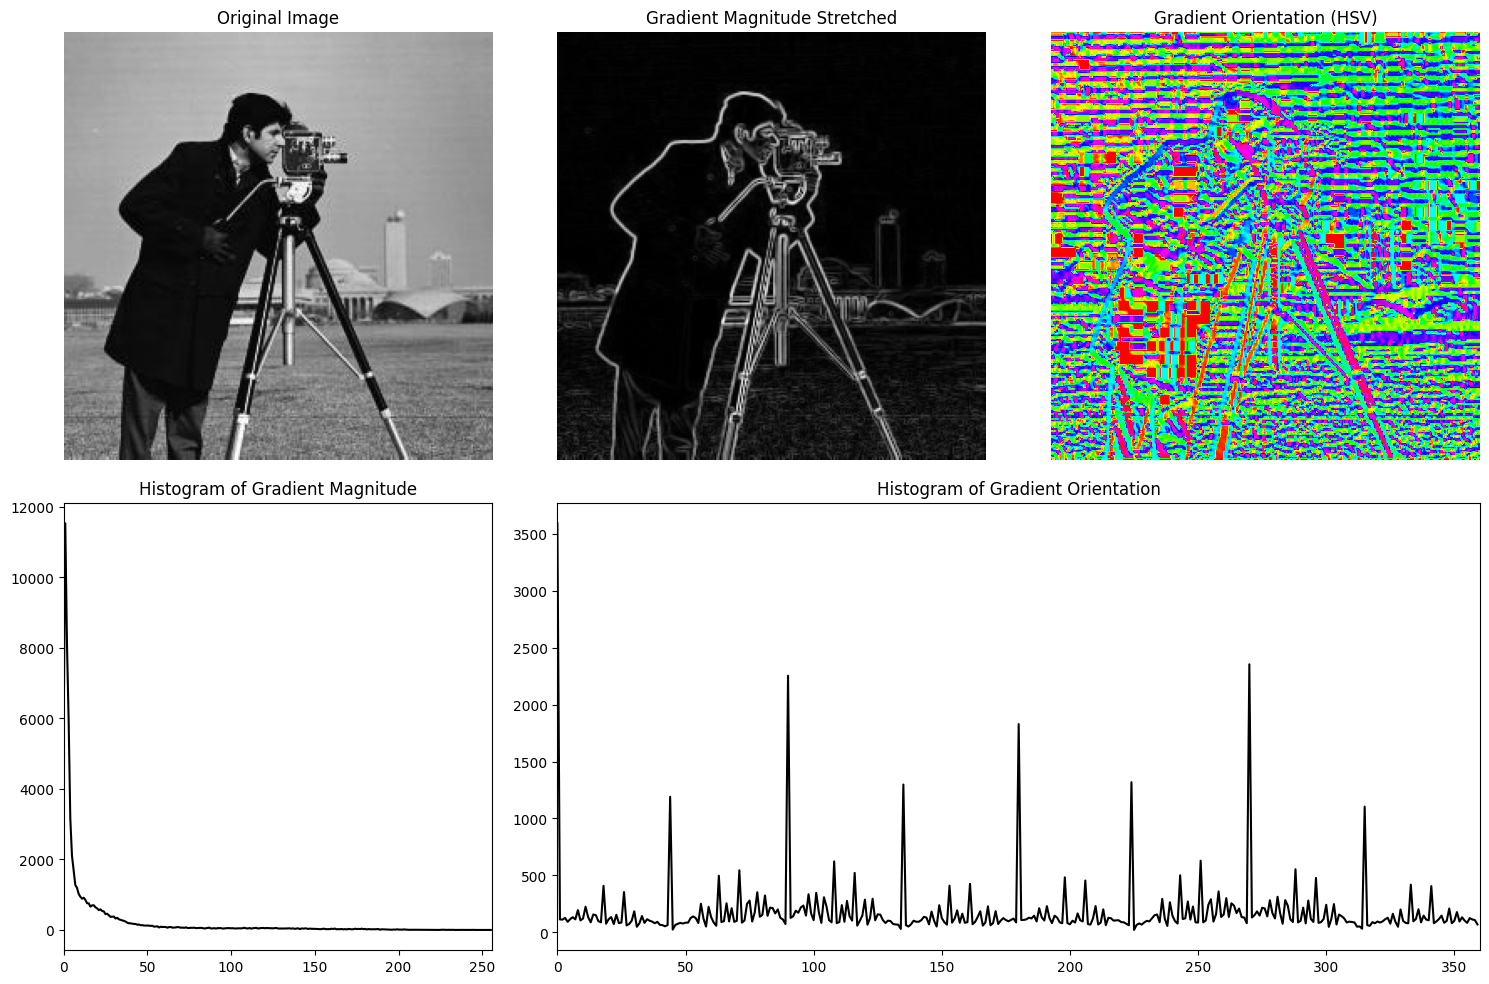

In [4]:
import cv2
from matplotlib import gridspec, pyplot as plt
import numpy as np


image_path = 'A1/A1/Q_4.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    raise ValueError(f"Image at path {image_path} could not be loaded. Please check the file path.")

# If the image is loaded successfully, proceed with the image processing and visualization tasks
# Compute the gradients using the Sobel operator
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in the x direction
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in the y direction

# Compute the gradient magnitude and orientation
magnitude = cv2.magnitude(grad_x, grad_y)
orientation = cv2.phase(grad_x, grad_y)

# Stretch the gradient magnitude for better visualization
magnitude_stretched = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Normalize the gradient orientation to the range [0, 2*pi]
orientation = np.mod(orientation, 2 * np.pi)
orientation_normalized = cv2.normalize(orientation, None, 0, 255, cv2.NORM_MINMAX)

# Convert orientation from radians to degrees for histogram
orientation_degrees = np.rad2deg(orientation)

# Compute histograms
hist_magnitude, _ = np.histogram(magnitude_stretched.ravel(), 256, [0, 256])
hist_orientation, _ = np.histogram(orientation_degrees.ravel(), 360, [0, 360])

# Set up the grid for plotting
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3)

# Original image
ax0 = plt.subplot(gs[0, 0])
ax0.imshow(image, cmap='gray')
ax0.set_title('Original Image')
ax0.axis('off')

# Gradient Magnitude Stretched
ax1 = plt.subplot(gs[0, 1])
ax1.imshow(magnitude_stretched, cmap='gray')
ax1.set_title('Gradient Magnitude Stretched')
ax1.axis('off')

# Gradient Orientation
ax2 = plt.subplot(gs[0, 2])
ax2.imshow(orientation_normalized, cmap='hsv')
ax2.set_title('Gradient Orientation (HSV)')
ax2.axis('off')

# Histogram of Gradient Magnitude
ax3 = plt.subplot(gs[1, 0])
ax3.plot(hist_magnitude, color='black')
ax3.set_title('Histogram of Gradient Magnitude')
ax3.set_xlim([0, 256])

# Histogram of Gradient Orientation
ax4 = plt.subplot(gs[1, 1:])
ax4.plot(hist_orientation, color='black')
ax4.set_title('Histogram of Gradient Orientation')
ax4.set_xlim([0, 360])

# Display the plot
plt.tight_layout()
plt.show()


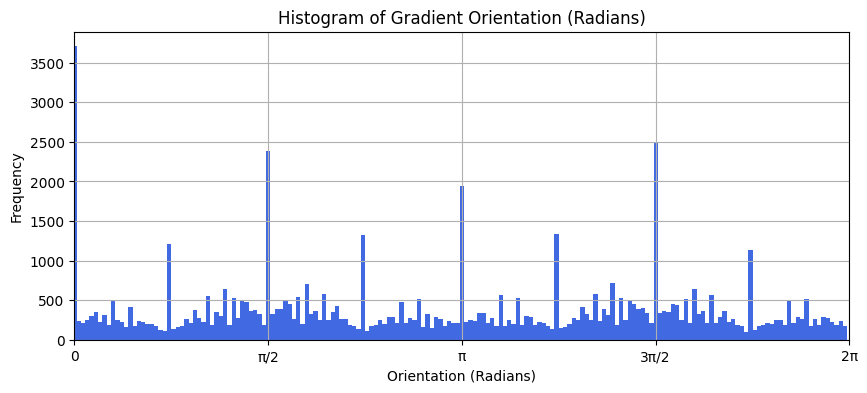

In [11]:
# Calculate the histogram of gradient orientation in radians with 180 bins for better resolution
hist_orientation_radians, bins_radians = np.histogram(orientation.ravel(), bins=180, range=[0, 2 * np.pi])

# Plotting the histogram of gradient orientation in radians
plt.figure(figsize=(10, 4))
plt.bar(bins_radians[:-1], hist_orientation_radians, width=bins_radians[1]-bins_radians[0], color='royalblue')
plt.title('Histogram of Gradient Orientation (Radians)')
plt.xlabel('Orientation (Radians)')
plt.ylabel('Frequency')
plt.xlim(0, 2 * np.pi)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', 'π/2', 'π', '3π/2', '2π'])
plt.grid(True)
plt.show()


Explanations :

Gradient Computation:

We use the cv2.Sobel function to compute the x and y gradients of the image. This operation detects horizontal and vertical edges by calculating the change in intensity for adjacent pixels.
Gradient Magnitude Visualization:

The magnitude of the gradient is a measure of the intensity of edges at each point in the image. We normalize this magnitude to the full 8-bit scale (0 to 255) to make it easier to visualize.
Histogram of Gradient Magnitude:

The histogram represents the distribution of edge intensities across the image. It provides insight into the overall contrast and the prevalence of edges.
Gradient Orientation Visualization:

The orientation indicates the angle at which edges occur in the image. We normalize and then map these angles to colors using the HSV colormap. This visual representation helps to understand the directionality of edges.
Histogram of Gradient Orientation:

Similar to the histogram of magnitude, the histogram of orientation shows the distribution of edge directions. It helps in understanding the texture and dominant directions of edges within the image.

I did the same but with diffrent x axies to view the Radian scale
